# 의사 결정 나무 분류 모형

의사 결정 나무(Decision Tree)는 여러 가지 규칙(rule)을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있으며 CART(Classification And Regression Tree Analysis) 모형이라고도 불리운다. 여기에서는 분류를 위한 의사 결정 모형을 살펴보자

* 클래스가 많아지면 NN를 쓴다.
* 피쳐 디멘션이 많아지면 나이브베이즈를 쓴다.
* 이것에 해당하지 않는 경우에는 디시젼 트리를 쓴다.
* 랜덤 포레스트는 디시전 트리를 여러번 한 것이다.
* 디시전 트리, 랜덤 포레스트는 약간 아무 때나 쓰는 경우로? 하지만 막 쓰다가 오버피팅이 일어날 수 있다. 어쨋든 디시전 트리 1개일 경우에는 직관적으로 보기가 좋다.
* 처음부터 영역을 아예 지정을 한다. 분류에도 쓸 수 있고 리그레션에도 쓸 수 있다. y값을 아예 지정해 놓을 수도 있기 때문에. 

의사 결정 나무에서는 규칙(rule)을 기반으로 독립 변수 공간을 영역(region)으로 분할하고 분할된 각각의 영역에 대해 다시 새로운 규칙을 적용하여 독립 변수 공간을 $M$개의 영역 $\mathbf{R}_m$으로 세분화 한다. 따라서 다음과 같은 조건부 확률을 가지는 확률 기반 

$$
p(y \mid x) = \sum_{m=1}^M \mathrm{I}(x \in \mathbf{R}_m)
$$

여기에서 $\mathrm{I}(x \in \mathbf{R}_m)$ 은 $x$ 가 $\mathbf{R}_m$ 에 속하면 1 이고 아니면 0 인 값을 가진다.

* y에 0을 넣을 지 1을 넣을 지 결정하는 것이 디시전 트리이다.
* (디시전 트리는 y가 카테고리값, 실수값 상관이 없다.나이브 베이즈의 경우? 실수가 피쳐에 섞여 버릴 경우 사이킷모델)
* 디시전 트리는 flexible하다.
* 보통은 레벨을 정한다. 계속 가다가는 오버피팅이 일어날 수 있기 때문에

## 규칙

영역 분할 규칙은 일반적으로 특정한 독립 변수(feature)의 값이 
  * 기준값(threshold)보다 큰지 혹은 작은지 (실수인 경우)
  * 특정 클래스(class)인지 (카테고리 값인 경우)
를 기준으로 한다.

이렇게 규칙을 적용하는 위치를 노드(node)라고 하며 규칙을 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.


In [1]:
import pydot
import StringIO
from IPython.core.display import Image 

def drawtree(command):
    graph = pydot.graph_from_dot_data(command) 
    image = graph.create_png()
    image_buf = StringIO.StringIO() 
    image_buf.write(image)
    return Image(image_buf.getvalue())

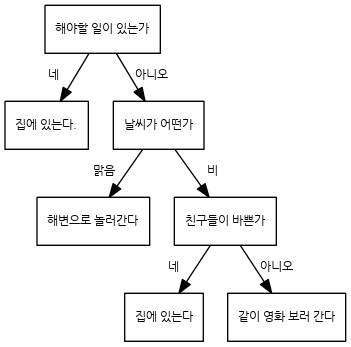

In [2]:
command = """
digraph Tree {
node [shape=box, fontname="NanumGothic", fontsize=9];
edge [labeldistance=2, fontname="NanumGothic", fontsize=9];
0 [label="해야할 일이 있는가"];
1 [label="집에 있는다."];
0 -> 1 [labelangle=45, headlabel="네"];
2 [label="날씨가 어떤가"];
0 -> 2 [labelangle=-45, headlabel="아니오"];
3 [label="해변으로 놀러간다"];
2 -> 3 [labelangle=45, headlabel="맑음"];
4 [label="친구들이 바쁜가"];
2 -> 4 [labelangle=-45, headlabel="비"];
5 [label="집에 있는다"];
4 -> 5 [labelangle=45, headlabel="네"];
6 [label="같이 영화 보러 간다"];
4 -> 6 [labelangle=-45, headlabel="아니오"];
}
"""

drawtree(command)    

## 의사 결정 나무 시각화

의사 결정 나무의 장점은 분류 과정이 사람이 쉽게 이해할 수 있는 직관적 규칙을 가진다는 점이다. 이 장점을 활용하기 위해서는 의사 결정 규칙을 시각화를 통해 표현해야 한다. 의사 결정 나무를 시각화하려면 GraphViz 프로그램과 pydot 파이썬 패키지를 사용한다. 

## 규칙 적용의 종료

노드에서 규칙이 적용되어 영역이 분할되면 각 영역 $R_m$에 속하는 표본 데이터 집합 $\{x_m, y_m\}$ 이 결정된다. 만약 하나의 영역에 속하는 모든 표본 데이터가 같은 클래스 값을 가진다면 더이상 영역을 분할할 필요가 없으므로 규칙 적용이 종료되고 하위 노드가 생성되지 않는다. 가장 극단적인 경우는 최종 영역이 하나의 표본 데이터만을 가지는 경우이다.

In [1]:
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names=iris.feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())
    #getvalue는 넣은 값을 다시 불러들일 때
    image = graph.create_png() 
    #png 포맷 형태로 랜더링을 한다.
    image_buf = StringIO.StringIO() 
    #메모리 상에 파일이 있다.
    image_buf.write(image)      
    #이미지는 ipython의 코어의 디스플레이의 이미지를 임포트 했다.
    return Image(image_buf.getvalue())


def plot_decision_regions(X, y, classifier, title):
    resolution=0.01 
    #점과 점 사이를 연결해주는 것?
    markers = ('s', '^', 'o', '^', 'v') 
    #클래스가 많이 필요하지는 않지만 일단 써 놓은 것
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    #칼라맵을 그대로 쓰기 위해서 만들어 놓은 것
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    #영역을 만들고 색깔을 칠해준다.
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): 
        #스캐터 플롯을 여러번 해준 것이다.
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)  

    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

In [4]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

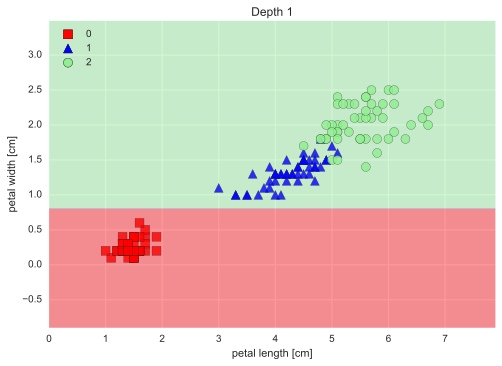

In [6]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)   #max_depth는 줄기 최대값
plot_decision_regions(X, y, tree1, "Depth 1")

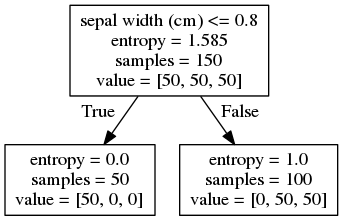

In [7]:
draw_decision_tree(tree1)

In [8]:
confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [9]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

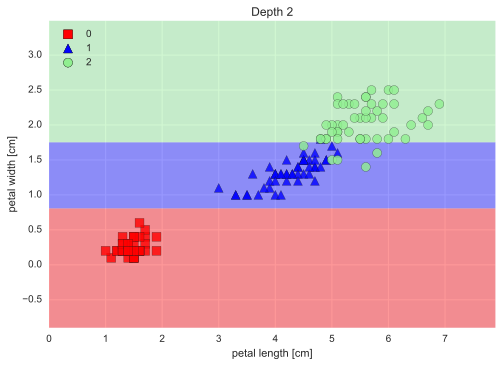

In [10]:
plot_decision_regions(X, y, tree2, "Depth 2")

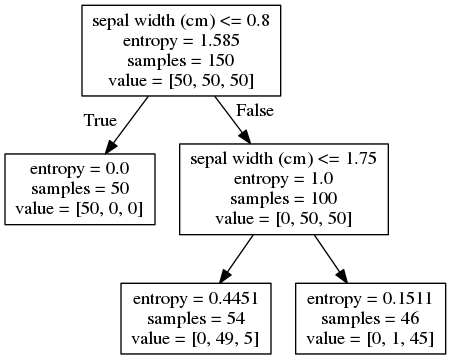

In [13]:
draw_decision_tree(tree2)   # <=1.75는 thresholds값

In [14]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [15]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

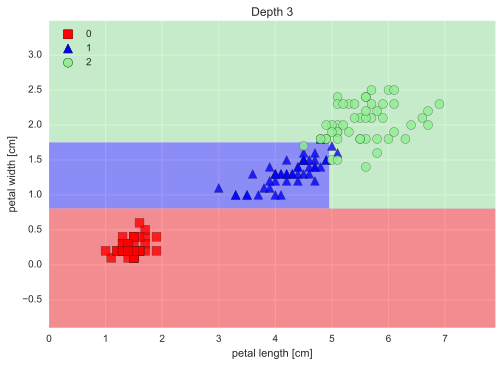

In [16]:
plot_decision_regions(X, y, tree3, "Depth 3")

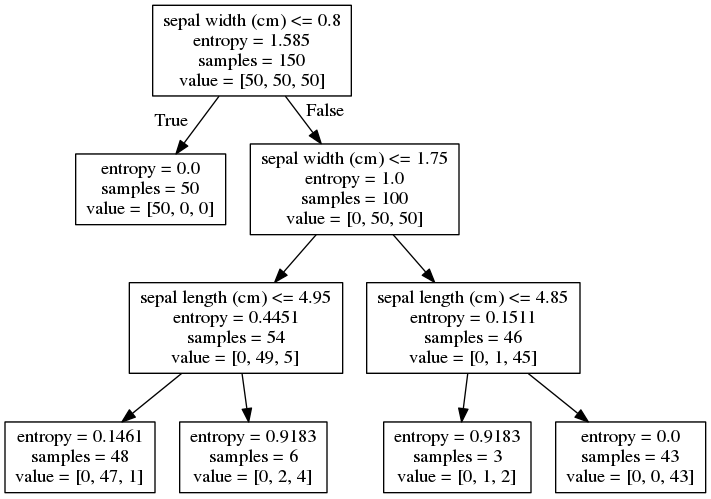

In [17]:
draw_decision_tree(tree3)
# 그 아래는 X축을 기준으로 나누었다. 

In [18]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [19]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)

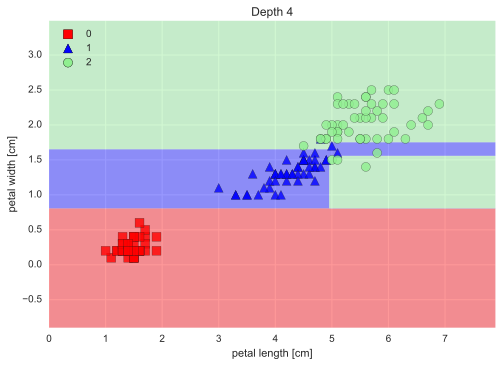

In [20]:
plot_decision_regions(X, y, tree4, "Depth 4")

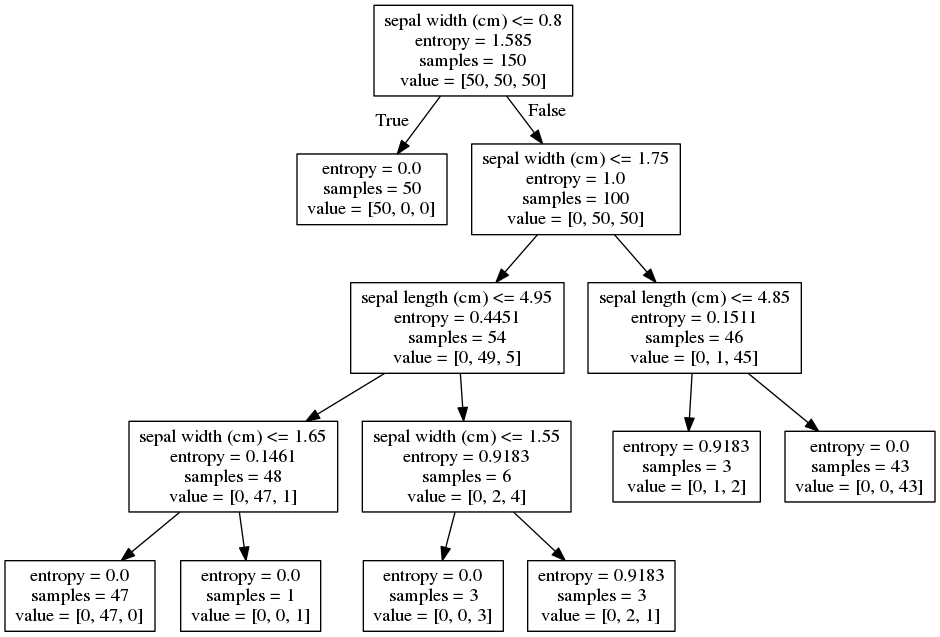

In [21]:
draw_decision_tree(tree4)
# 1번 더 했다. 그 밑에는 다시 또 sepal width 기준으로 갈랐더니 또 다른 새로운 영역이 생겼다.

In [22]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [23]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)

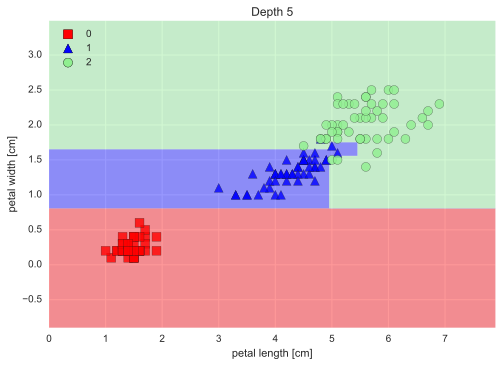

In [24]:
plot_decision_regions(X, y, tree5, "Depth 5")

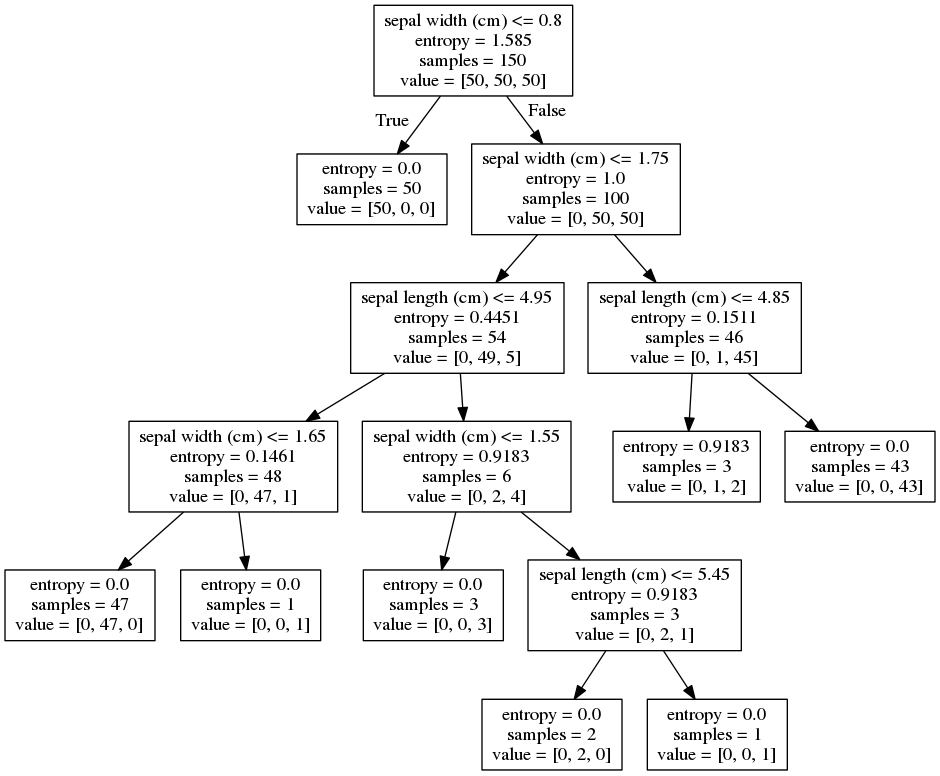

In [25]:
draw_decision_tree(tree5)

In [26]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

##  노드 생성 방법

노드를 생성하는 것은 독립 변수 $X$의 값에 따라 데이터를 분리하는 작업이다. 

올바른 노드 생성 즉, 데이터 분리는 데이터를 분리함으로써 각 노드 안에 있는 데이터의 동질성(purity)이 높아지거나 전체 확률 분포의 엔트로피가 낮아져야 한다. 이러한 기준을 정량화한 것이 information gain 또는 impurity function 이다.

의사 결정 나무에서는 이러한 Information Gain 값이나 impurity function 이 가장 많이 향상되는 독립 변수 $X$ 와 기준값(threshold)를 다양한 시도를 통해 찾아낸다.

## Information Gain

IG(information gain)는 데이터 분리에 의해 확률 변수의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다.

$$ IG[Y,X] = H[Y] - H[Y|X] $$ 

예를 들어 다음과 같은 두가지 경우를 생각하자.

<img src="https://datascienceschool.net/upfiles/50d9204d21e840a3915d941667843c78.png" style="width:70%; margin: 0 auto 0 auto;">



A 방법과 B 방법 모두 노드 분리 전에는 Y=0 인 데이터의 수와 Y=1 인 데이터의 수가 모두 40개였다. 

A 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 A1은 Y=0 인 데이터가 30개, Y=1 인 데이터가 10개 
* 자식 노드 A2은 Y=0 인 데이터가 10개, Y=1 인 데이터가 30개 

B 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 B1은 Y=0 인 데이터가 20개, Y=1 인 데이터가 40개 
* 자식 노드 B2은 Y=0 인 데이터가 20개, Y=1 인 데이터가 0개 

우선 부모 노드의 엔트로피를 계산하면 다음과 같다.


$$ H[D] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1 $$


A 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[A1] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81 $$

$$ H[A2] = -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right)  -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) = 0.81 $$

$$ IG = H[D] - \dfrac{1}{2} H[A1] - \dfrac{1}{2} H[A2] = 0.19 $$ 

B 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[B1] = -\dfrac{1}{3}\log_2\left(\dfrac{1}{3}\right) - \dfrac{2}{3}\log_2\left(\dfrac{2}{3}\right) = 0.92 $$

$$ H[B2] = 0 $$

$$ IG = H[D] - \dfrac{3}{4} H[B1]  - \dfrac{1}{4} H[B2] = 0.31 $$ 

따라서 B 방법이 더 나은 방법임을 알 수 있다.

## 의사 결정 나무 분류 모형의 사용 예: Iris 

In [2]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

plt.figure(figsize=(10,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],  [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.tight_layout()
plt.show()

NameError: name 'iris' is not defined

## 의사 결정 나무 분류 모형의 사용 예: 타이타닉 생존자 예측

In [3]:
df = pd.read_csv('http://dato.com/files/titanic.csv', index_col=0)
df.head()
# Pclass는 특등실~ Name은 피쳐에 넣으면 안 된다. 넣으면 오버피팅이 된다. SibSp는 형제가 같이 탑승했느냐
# parch는 가족수. fare는 Pclass랑 거의 비슷하니까 다중공선성이 일어날 수 있다.
# 그래서 상식적으로 넣을 만한 것은 몇 등실,  나이, 성별만

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
feature_names = ["Pclass", "Age", "Sex"]
dfX = df[feature_names]
dfy = df["Survived"]
dfX.tail()

,Pclass,Age,Sex
PassengerId,,,
887,2,27.0,male
888,1,19.0,female
889,3,NaN,female
890,1,26.0,male
891,3,32.0,male


In [5]:
dfX.ix[:,"Age"].fillna(int(dfX["Age"].mean()), inplace=True)
dfX.tail()   #imputaion 과정

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Pclass,Age,Sex
PassengerId,,,
887,2,27.0,male
888,1,19.0,female
889,3,29.0,female
890,1,26.0,male
891,3,32.0,male


In [6]:
from sklearn.preprocessing import LabelEncoder
dfX.ix[:,"Sex"] = LabelEncoder().fit_transform(dfX["Sex"])
dfX.tail()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Pclass,Age,Sex
PassengerId,,,
887,2,27.0,1
888,1,19.0,0
889,3,29.0,0
890,1,26.0,1
891,3,32.0,1


In [7]:
from sklearn.preprocessing import OneHotEncoder
dfX2 = pd.DataFrame(OneHotEncoder().fit_transform(dfX["Pclass"].as_matrix()[:,np.newaxis]).toarray(), 
                    columns=['first_class', 'second_class', 'third_class'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["Pclass"])
dfX.tail()

,Age,Sex,first_class,second_class,third_class
PassengerId,,,,,
887,27.0,1,0.0,1.0,0.0
888,19.0,0,1.0,0.0,0.0
889,29.0,0,0.0,0.0,1.0
890,26.0,1,1.0,0.0,0.0
891,32.0,1,0.0,0.0,1.0


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

In [10]:
command_buf = StringIO.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['age','sex','1st_class','2nd_class','3rd_class']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue()) 
image = graph.create_png()
image_buf = StringIO.StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

NameError: name 'StringIO' is not defined

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
confusion_matrix(y_train, model.predict(X_train))

array([[366,  55],
       [ 68, 179]])

In [14]:
confusion_matrix(y_test, model.predict(X_test))

array([[111,  17],
       [ 30,  65]])

In [15]:
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.84      0.87      0.86       421
          1       0.76      0.72      0.74       247

avg / total       0.81      0.82      0.81       668



In [16]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       128
          1       0.79      0.68      0.73        95

avg / total       0.79      0.79      0.79       223



# 디시전 트리로 클레시파이 만들고 얼마나 확률 나오는지

In [17]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
news = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=1)
news_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=2)

In [19]:
len(news.data), len(news_test.data)

(1554, 1034)

In [20]:
set(news.target), set(news_test.target)

({0, 1, 2}, {0, 1, 2})

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words="english")
X = vect.fit_transform(news.data)
y = news.target

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy').fit(X,y)

In [23]:
X_test = vect.transform(news_test.data)
y_test = news_test.target
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.79      0.83      0.81       389
          1       0.84      0.83      0.83       394
          2       0.84      0.80      0.82       251

avg / total       0.82      0.82      0.82      1034



In [24]:
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       584
          1       1.00      1.00      1.00       593
          2       1.00      1.00      1.00       377

avg / total       1.00      1.00      1.00      1554



In [25]:
import pydot, StringIO
from sklearn.tree import export_graphviz
from IPython.core.display import Image

def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO()
    export_graphviz(classifier, out_file=dot_buf, feature_names=[x.encode("utf-8") for x in list (vect.vocabulary_)])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())
    image = graph.create_png()
    image_buf = StringIO.StringIO()
    image_buf.write(image)
    return Image(image_buf.getvalue())

ImportError: No module named 'StringIO'

In [26]:
draw_decision_tree(model)

NameError: name 'StringIO' is not defined

In [27]:
news.target_names

['comp.graphics', 'sci.space', 'talk.religion.misc']

In [28]:
df = pd.DataFrame({"x":news.data, "y":news.target})
df.tail()

,x,y
1549,"Subject: Re: ""Imaginary"" Friends - Info and Ex...",2
1550,From: prb@access.digex.com (Pat)\nSubject: Re:...,1
1551,From: 18084TM@msu.edu (Tom)\nSubject: Level 5?...,1
1552,From: henry@zoo.toronto.edu (Henry Spencer)\nS...,1
1553,From: apryan@vax1.tcd.ie\nSubject: Order MOORE...,1


In [29]:
df[df.x.str.contains("inclination*")]

,x,y
113,From: dnadams@nyx.cs.du.edu (Dean Adams)\nSubj...,1
407,From: gawne@stsci.edu\nSubject: Re: Vulcan? (...,1
650,From: dbm0000@tm0006.lerc.nasa.gov (David B. M...,1
861,From: leech@cs.unc.edu (Jon Leech)\nSubject: S...,1
891,From: leech@cs.unc.edu (Jon Leech)\nSubject: S...,1
897,From: bil@okcforum.osrhe.edu (Bill Conner)\nSu...,2
1160,From: thomsonal@cpva.saic.com\nSubject: Cosmos...,1
1180,From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...,1


In [30]:
print(df.x[113])

From: dnadams@nyx.cs.du.edu (Dean Adams)
Subject: Ariane v.56 Mission Data
Organization: University of Denver, Dept. of Math & Comp. Sci.
Lines: 114



ARIANESPACE FLIGHT 56

(Flight V.56 was originally intended to carry the Hughes HS-601 series 
Galaxy IV satellite, but the payload was withdrawn just prior to flight.)

The 56th Ariane launch is now scheduled to place the ASTRA 1C and ARSENE 
satellites into an improved geostationary transfer orbit (GTO), with 
inclination reduced to 5 degrees and apogee altitude increased by 150 km.
This will be the 28th launch of an Ariane 4 and the first in the 42L 
configuration, with 2 liquid strap-on boosters (PAL).  It will be launched
from the newly refurbished Ariane launch complex ELA 2, in Kourou - French 
Guiana.

The launch vehicle performance requirement for this mission is 3,147 kg
of which 2,944 kg represents the satellite mass.  The total vehicle mass
at liftoff is 361,778 kg.


Required Orbit Characteristics:
  Perigee Altitude ..... 